# Chapter 33: Supervised Learning – Linear Regression in Practice

**Objective:**
Learn how to build and use a simple Linear Regression model using Python. Understand how to train the model, make predictions, and evaluate its accuracy.

## 33.1 What is Linear Regression?

Linear Regression is a supervised learning algorithm used for predicting continuous numerical outputs based on one or more input features.

It assumes a linear relationship between features (independent variables) and the target (dependent variable).

Example:
Predicting house price based on area, bedrooms, and location.

Intuition

We try to find the best-fit straight line through the data points such that the predicted values are as close as possible to the actual values.

For one feature, The formula used:

**y = mx + b**

Where:
- y = predicted value
- x = input variable
- m = slope (coefficient)
- b = intercept


For multiple features:
ŷ = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
Where:

- ŷ = predicted output
- xᵢ = features
- wᵢ = weights (coefficients)
- b = bias (intercept)

Model learns the best values of weights & bias.

---

## "Best Fit"?

The best line is the one that minimizes error.
We measure error using Loss Function:

Mean Squared Error (MSE)
MSE=m1​i=1∑m​(yi​−yi​^​)2

Where:

- yi = actual value
- ŷi = predicted value
- m = number of samples

Goal: Minimize MSE → minimize the error.

---

## How Does the Model Learn?

Two common methods:

1. Normal Equation (Closed-form solution)
θ=(XTX)−1XTy

Works well for small datasets, becomes slow when features > 10,000.

2. Gradient Descent (Iterative optimization)

- Update weights repeatedly in the direction that reduces loss
- Uses learning rate (α) to control step size

Update rule:​
w:=w−α⋅∂w∂MSE​

Used when data is large.

---

## Assumptions of Linear Regression

To perform well, linear regression assumes:

| Assumption              | Meaning                                      |
|-------------------------|----------------------------------------------|
| Linearity               | Relationship between features & target is linear |
| Independence            | Data points are independent                  |
| Homoscedasticity        | Constant variance of errors                  |
| Normality of residuals  | Errors follow normal distribution            |
| No multicollinearity    | Features should not be strongly correlated   |

We check these using scatter plots, VIF scores, etc.

## Variants of Linear Regression
| Type              | When to use          | Description                     |
|-------------------|----------------------|---------------------------------|
| Simple Linear     | 1 feature            | Straight line fit               |
| Multiple Linear   | >1 feature           | Multiple inputs                 |
| Polynomial        | Curved relationships | Fit polynomial terms            |

## Model Evaluation Metrics

For regression problems:

| Metric          | Meaning             | Good Value      |
|-----------------|---------------------|-----------------|
| R² score        | Explained variance  | Closer to 1     |
| MSE / RMSE / MAE| Error measure       | Closer to 0     |

---

## Common Pitfalls

- Using linear regression for non-linear data
- Ignoring multicollinearity
- Not scaling features when using Gradient Descent
- Predicting values outside trained domain (extrapolation)

## When Should You Use Linear Regression?

- When target is continuous
- When the relationship appears linear
- When interpretability is important
- For baseline model to compare with more complex models

---

## 33.2 Use Case: Student Performance

Data of hours studied and marks scored is available.  
`Goal`: predict marks for a new student based on hours studied.

## 33.3 Required Libraries

Install required packages:

`pip install pandas numpy scikit-learn matplotlib`

We’ll use:
- pandas to load data
- scikit-learn to build the model
- matplotlib for plotting

## 33.4 Load the Dataset

In [4]:
import pandas as pd
data = pd.read_csv("student_scores.csv")
#data['timestamps'] = pd.to_datetime(data['timestamps'])
print(data.head(10))

     name  hours  score gender grades class
0   Aarav      8     76      M      A    9A
1    Riya      5     62      F      B    9B
2   Kabir     10     88      M      A   10A
3    Sana      4     55      F      C    9A
4  Vivaan      7     72      M      B   10B
5  Ishita      6     64      F      B    9C
6   Rohan      3     48      M      D    9B
7   Meera      9     90      F      A   11A
8  Aditya      2     38      M      F    9C
9   Kavya     11     93      F      A   12A


## 33.4.1 Inspect the dataset

In [5]:
# Inspect columns and basic info
print('Columns:', data.columns.tolist())

#1.Dataset Basic Info
print('\nDataset Info:')
print(data.info())


#2.Completeness: Check for missing values:
#Checks if any column has missing/null values.
print('\nDataset Completeness:')
print(data.isnull().sum())


#3.Dataset Consistency: All numeric columns should be numeric.
print('\nDataset Consistency:')
print(data.dtypes)           # Check datatype consistency


Columns: ['name', 'hours', 'score', 'gender', 'grades', 'class']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB
None

Dataset Completeness:
name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64

Dataset Consistency:
name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object


In [6]:
#4.Accuracy: Values realistic or outlier
print('\nDataset Describe:')
data.describe()       # Summary stats
#data['hours'].plot(kind='box')

#5.TIME-KEEPING — Is the data up-to-date?
print('\nDataset Time-Keeping:')
print('\nNo timestamps')

#6.BIAS Check — Is data skewed toward 1 user group?
print('\nDataset Bias')
print(data['gender'].value_counts(normalize=True))
print(data['grades'].value_counts(normalize=True))
data['class'].value_counts(normalize=True)


Dataset Describe:

Dataset Time-Keeping:

No timestamps

Dataset Bias
gender
F    0.51087
M    0.48913
Name: proportion, dtype: float64
grades
B    0.358696
A    0.326087
C    0.195652
D    0.086957
F    0.032609
Name: proportion, dtype: float64


class
9A     0.141304
10A    0.119565
9B     0.108696
9C     0.108696
10B    0.086957
11A    0.086957
10C    0.076087
12A    0.065217
12B    0.065217
11B    0.054348
12C    0.054348
11C    0.032609
Name: proportion, dtype: float64

## 33.4.2  Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `student_performance_data.csv` (demo dataset) |
| **Description**     | Contains student study behavior and academic performance data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**        | `name`, `hours`, `score`, `gender`, `grades`, `class` |
| **Target Variable** | *None* (Exploratory dataset only) |
| **Number of Rows**  | 92 |
| **Null Handling**   | No missing values detected across any feature |
| **Transformations** | Label encoding applied to `class` → `class_encoded`; datatype validation performed; value distribution and proportion analysis conducted for `gender`, `grades`, and `class` |
| **Owner**           | Student / Notebook Author |
| **Last Updated**    | 2025-12-19 |

## 33.5 Separate Features and Labels

In [7]:
categorical = data.select_dtypes(include='object').columns
numerical = data.select_dtypes(exclude='object').columns

print("Categorical Features:", list(categorical))
print("Numerical Features:", list(numerical))

# Encode class column
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#data["class_encoded"] = le.fit_transform(data["grades"])

X = data[["hours"]]
y = data["score"]

Categorical Features: ['name', 'gender', 'grades', 'class']
Numerical Features: ['hours', 'score']


## 33.5.1 Data Distribution

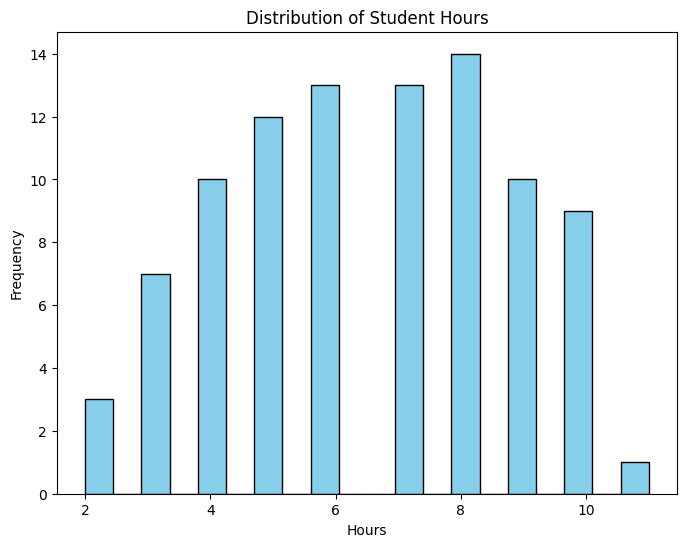

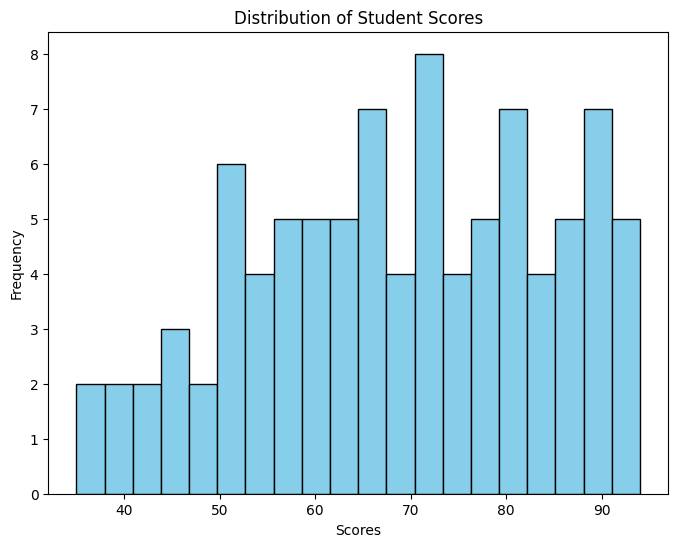

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(X, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Student Hours')
plt.show()

plt.figure(figsize=(8,6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Student Scores')
plt.show()

## 33.6 Split the Data

In [9]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
    #stratify=y
)


## 33.7 Train the Model


In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) 


print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)
#The coefficient indicates how much the score increases for every additional hour of study.

Model Coefficient (Slope): 6.804392044598464
Model Intercept: 24.617635980111494


## 33.8 Make Predictions


In [16]:
y_pred = model.predict(X_test)
pred_data = {'Y_prediction': y_pred.round(2),
             'Y_test': y_test.reset_index(drop=True)}

prediction_table = pd.DataFrame(pred_data)
prediction_table


,Y_prediction,Y_test
0,79.05,81
1,85.86,84
2,45.03,40
3,38.23,36
4,79.05,76
5,79.05,82
6,72.25,75
7,85.86,85
8,58.64,60
9,45.03,43


## 33.9 Plot the Line of Regression


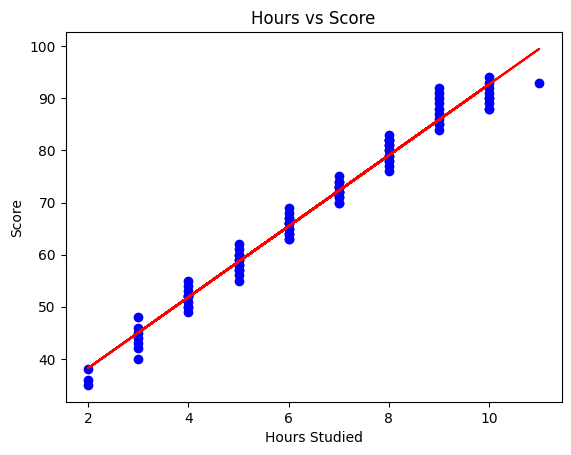

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()


## 33.9.1 Linear Regression Assumptions

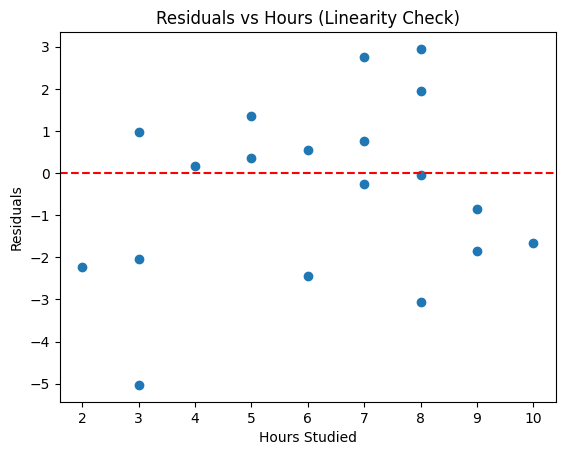

In [21]:
# Residuals
residuals = y_test - y_pred

# 1. Linearity check (Residuals vs X)
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Hours Studied")
plt.ylabel("Residuals")
plt.title("Residuals vs Hours (Linearity Check)")
plt.show()

Residuals should be randomly scattered

No clear curve or pattern

## 33.10 Evaluate the Model


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

#RMSE represents the average error in score prediction.
#For example, an RMSE of 6 means predictions are off by ~6 marks on average.

MSE  : 4.24
RMSE : 2.06
R²   : 0.984


## 33.10.1 Actual vs Predicted Plot

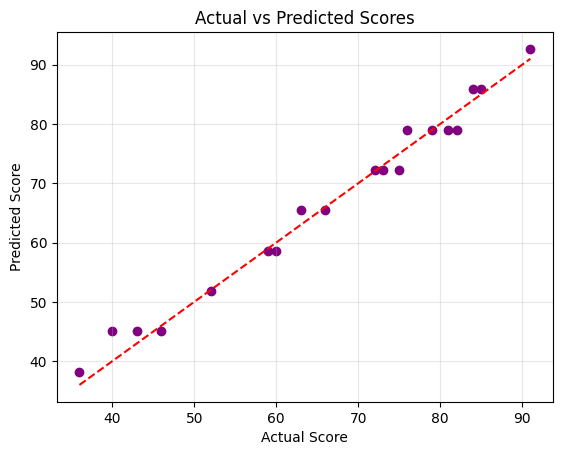

In [22]:
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.grid(alpha=0.3)
plt.show()

Points close to diagonal → good predictions

Large deviation → prediction error

## 33.10.2 Baseline Comparison

In [25]:
# Baseline prediction: mean of training scores
baseline_pred = [y_train.mean()] * len(y_test)

baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print("Baseline MSE:", round(baseline_mse, 2))
print("Baseline R² :", round(baseline_r2, 3))

Baseline MSE: 272.91
Baseline R² : -0.034


If your model doesn’t beat baseline → model is useless

This teaches model validation thinking

## 33.11 Try It Yourself – Lab Task
Dataset:

    "Hours": [1, 2, 3, 4, 5, 6, 7, 8], 

    "Score": [35, 42, 51, 60, 68, 77, 85, 90]

Steps:
- Load data into pandas
- Separate X and y
- Train a Linear Regression model
- Predict scores
- Plot actual vs predicted
- Evaluate using Mean Squared Error and R² Score

###  Topic: Linear Regression Practice

---

###  **Dataset**
```python
"Hours": [1, 2, 3, 4, 5, 6, 7, 8],
"Score": [35, 42, 51, 60, 68, 77, 85, 90]
 ```
 ---
 
## Step 1: Load data into pandas
```python
import pandas as pd
# Create dataset
data = {
    "Hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "Score": [35, 42, 51, 60, 68, 77, 85, 90]
}
df = pd.DataFrame(data)
print(" Dataset Loaded Successfully!\n")
print(df)
```
---

## Step 2: Separate X and y
```python
X = df[["Hours"]]   # Features (independent variable)
y = df["Score"]     # Target (dependent variable)

print("Feature Sample:\n", X.head())
print("Target Sample:\n", y.head())
```

## Step 3: Train a Linear Regression model
```python
from sklearn.linear_model import LinearRegression
# Create and train model
model = LinearRegression()
model.fit(X, y)
print("Model Trained Successfully!")
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
```
---

## Step 4: Predict Scores
```python
# Predict using trained model
y_pred = model.predict(X)
# Display comparison
df["Predicted_Score"] = y_pred.round(2)
print("\n Actual vs Predicted Scores:\n")
print(df)
```
---

## Step 5: Plot Actual vs Predicted
```python
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label="Actual")
plt.plot(X, y_pred, color='red', label="Predicted Line")
plt.title("Hours vs Score (Linear Regression)")
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
```
---

## Step 6: Evaluate the Model
```python
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("\n Model Evaluation:")
print("Mean Squared Error (MSE):", round(mse, 3))
print("R² Score:", round(r2, 3))
```

## 33.12 Exercises
1. What is the formula for Linear Regression?
2. How do you train a linear regression model in scikit-learn?
3. Write code to plot actual vs predicted scores using matplotlib.
4. What does R2 score indicate?
5. Predict the score of a student who studied for 9.5 hours using your model.

## 1. What is the formula for Linear Regression?

**Answer:**  
The **Linear Regression** equation represents a straight-line relationship between input (X) and output (Y):

    [Y = mX + c]

Where:  
- **Y** = Predicted value (target variable)  
- **X** = Input feature  
- **m** = Slope or coefficient (how much Y changes with X)  
- **c** = Intercept (Y value when X = 0)

---

## 2. How do you train a Linear Regression model in scikit-learn?

**Answer:**  
You can train a model in just three steps — import, fit, and predict.

```python
from sklearn.linear_model import LinearRegression
# Sample Data
X = [[1], [2], [3], [4], [5]]
y = [10, 20, 30, 40, 50]
# Create and train model
model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
```
---

## 3. Write code to plot actual vs predicted scores using matplotlib

**Answer:**<br>
```python
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
# Data
df = pd.DataFrame({
    "Hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "Score": [35, 42, 51, 60, 68, 77, 85, 90]
})
# Train Model
X = df[["Hours"]]
y = df["Score"]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, y_pred, color="red", label="Predicted")
plt.title("Actual vs Predicted Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
```
---

## 4. What does R² score indicate?

**Answer:**<br>
The R² Score (Coefficient of Determination) measures how well the regression model fits the data.<br>
    **R²=1-SSres/SStot**<br>
Where:<br>
    SSres = Sum of squared residuals (errors)<br>
    SStot = Total sum of squares

---

## 5. Predict the score of a student who studied for 9.5 hours using your model

**Answer:**<br>
```python
hours = [[9.5]]
predicted_score = model.predict(hours)
print(f"Predicted Score for 9.5 hours: {predicted_score[0]:.2f}")

#Output
Predicted Score for 9.5 hours: 96.5

```

**Quick Recap:**
- Linear Regression is used to predict numerical values.
- We trained a model using scikit-learn.
- Evaluated it using metrics like MSE and R² score.
- You can visualize predictions using a line graph.

## 33.13 Common Mistakes in Linear Regression

- Using grades to predict scores (data leakage)
- Using classification metrics for regression
- Interpreting high R² without checking residuals
- Applying stratify to continuous targets
- Forgetting to reset indices before comparison

### When NOT to Use Linear Regression
Linear Regression should not be used when:
- Relationship is non-linear
- Errors are not evenly distributed
- Target is categorical
- Strong outliers dominate